In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
# Función que vamos a intentar aprender
def func(x1, x2):
    return np.sin(x1) + np.log(x2 + 1) + (x1 * x2)

# Generar un dataset con valores de x1 y x2
np.random.seed(42)
X1 = np.random.uniform(0, 10, 1000)  # Variable x1 entre 0 y 10
X2 = np.random.uniform(0, 10, 1000)  # Variable x2 entre 0 y 10
y = func(X1, X2)  # Valores reales de la función

# Crear el dataset con las variables X1 y X2
X = np.column_stack((X1, X2))

In [3]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de red neuronal multicapa (MLP) para regresión
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta con 64 neuronas
    Dense(64, activation='relu'),  # Otra capa oculta con 64 neuronas
    Dense(1)  # Capa de salida para regresión (1 valor continuo)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en el conjunto de prueba (MSE): {test_loss:.2f}")

# Calcular el RMSE (Raíz del Error Cuadrático Medio)
rmse = np.sqrt(test_loss)
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.2f}")

# Calcular MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1286.6255 - val_loss: 970.6588
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1164.1166 - val_loss: 868.8778
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1042.8414 - val_loss: 672.4856
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 834.6772 - val_loss: 397.3891
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 400.5980 - val_loss: 151.6923
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 134.2908 - val_loss: 55.6155
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 52.6695 - val_loss: 40.4029
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.4603 - val_loss: 34.3446
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 32.6182 - val_loss: 30.5995
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.1932 - val_loss: 27.4078
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 25.9755 - val_loss: 24.8750
Epoch 12/100
25/25 ━━━━

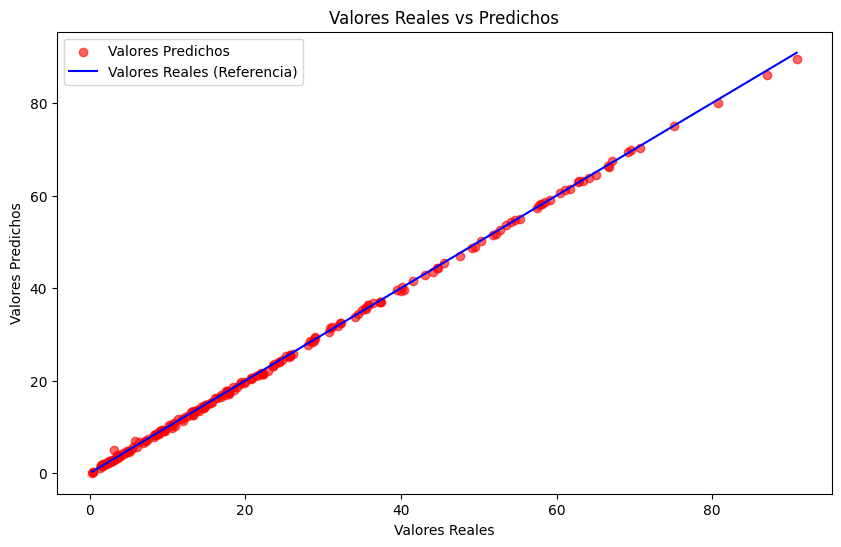

In [5]:
# Graficar los valores reales y predichos para la función
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.6, label='Valores Predichos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', label='Valores Reales (Referencia)')
plt.title('Valores Reales vs Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


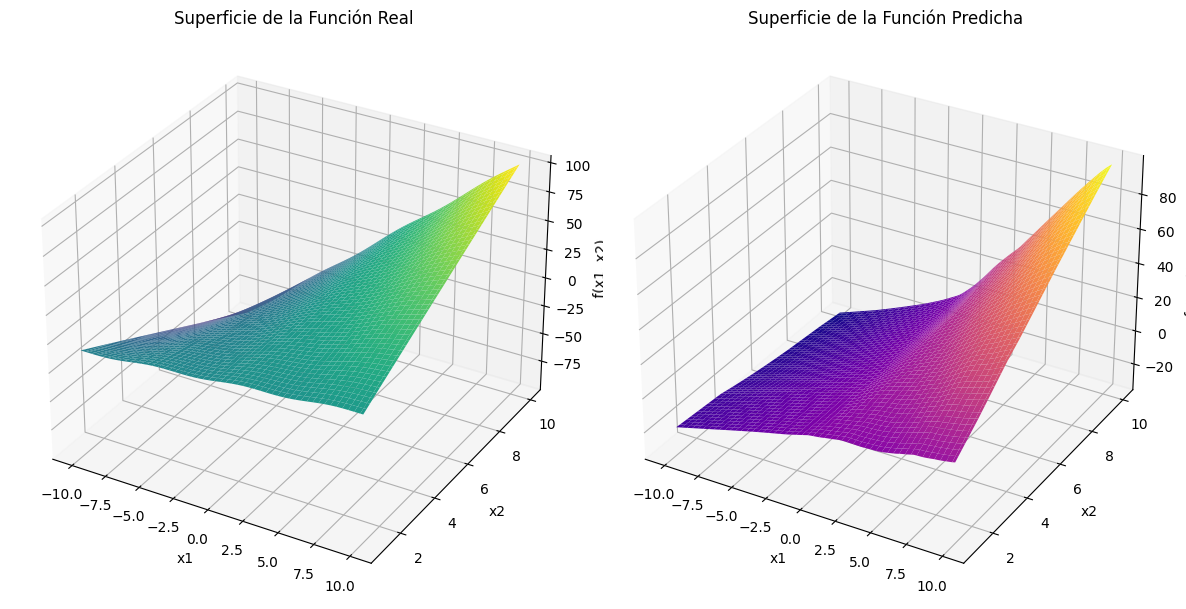

In [6]:
# Visualizar la superficie de la función y la superficie predicha
fig = plt.figure(figsize=(12, 6))
# Crear un meshgrid para graficar las superficies
x1_range = np.linspace(-10, 10, 100)
x2_range = np.linspace(1, 10, 100)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)
y_real_surface = func(X1_mesh, X2_mesh)

# Graficar la función real
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X1_mesh, X2_mesh, y_real_surface, cmap='viridis')
ax.set_title('Superficie de la Función Real')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')

# Graficar la función predicha
X1_flat = X1_mesh.flatten()
X2_flat = X2_mesh.flatten()
X_mesh_scaled = scaler.transform(np.column_stack((X1_flat, X2_flat)))
y_pred_surface = model.predict(X_mesh_scaled).reshape(X1_mesh.shape)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X1_mesh, X2_mesh, y_pred_surface, cmap='plasma')
ax2.set_title('Superficie de la Función Predicha')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('f_pred(x1, x2)')

plt.tight_layout()
plt.show()